Note this script uses other files than regular differential gene expression tables. These files are not filtered by significance, but by gene names, namely by gene names from the Aging Signature list. The script will collect all those data and make the integral table with all available fold change data for all genes and lists.

import packages, make function for getting line items
activate matplotlib notebook option (or not, it feels clumsy in both cases)

In [1]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import axes3d
#activate matplotlib notebook option
%matplotlib notebook

#function for reading files
def getitems(fil):
    sfil=open(fil, "r"); lines=sfil.readlines(); sfil.close()
    items=[x.rstrip().split("\t") for x  in lines[1:]]
    return(items)

get aging list from file and make a AS subset

In [2]:
#load list and make signature
items=getitems("Aging_List_REAN.txt")
#here we definee Aging Signature list as all genes with reference index>3.
#It is an arbitrary threshold, and you can change it the way you like
ASgenes=[x[0] for x in items if int(x[1])>3]
print("len all genes", len(items))
print("len AS", len(ASgenes))

len all genes 5443
len AS 222


Now we open all files previously used to make the Aging List and compile the table for genes from Aging Signature only.

In [ ]:
#load individual files and collect data
mdir="/Users/leonid_bystrykh/Documents/Articles&Presentations/2020/AgingSign/data/rean/AS_filtered/"
files=["Bersenev_AS.csv","Chambers_AS.csv","Flach_AS.csv","Norddahl_AS.csv","Wahlestedt_AS.csv",
       "Grover_AS.csv","Kirshner_AS.csv","Kowalczyk_AS.csv","Mann_AS.csv",
    "Lazare_AS.csv","Maryanovich_AS.csv","Sun_AS.csv"]

the block below will generate the table. This is the most essential part of the script. You can modify it according to you specific needs. Note, that if no data available, the "0"-value will be added to the table.

In [6]:
logFCs, Gnames=[],[]
for file in files:
    myitems=getitems(mdir+file)
    mygenes=[x[1] for x in myitems]
    myfreqs=[float(x[2])for x in myitems]
    #collect logFCs, redundant gene names in arrays!
    freqs=[]
    #loop through signature gene names
    for i in range(len(ASgenes)):
        fre=[]
        #loop through current file 
        for j in range(len(mygenes)):
            if ASgenes[i]==mygenes[j]:
                fre.append(myfreqs[j])
        freqs.append(fre)
    #adjust to single value per gene
    new_freqs=[]
    for fre in freqs:
        if len(fre)>1:
            new_freqs.append(sum(fre)/len(fre))
        if len(fre)==1:
            new_freqs.append(fre[0])
        if len(fre)==0:
            #if nothing found, add 0 or NA
            new_freqs.append(0)
    logFCs.append(new_freqs)
print("len freqs", len(logFCs))

len freqs 12


now we can check number of found genes per set

In [7]:
for i in range(len(files)):
    found=[x for x in logFCs[i] if x!=0]
    print(files[i], len(found))

Bersenev_AS.csv 199
Chambers_AS.csv 170
Flach_AS.csv 195
Norddahl_AS.csv 195
Wahlestedt_AS.csv 195
Grover_AS.csv 106
Kirshner_AS.csv 76
Kowalczyk_AS.csv 67
Mann_AS.csv 69
Lazare_AS.csv 183
Maryanovich_AS.csv 183
Sun_AS.csv 184


you can save the table in two formats. I prefer using "transposed" option

In [8]:
def save_to(file_out):
    file_out="AS_table.csv"
    f_out=open(file_out, "w")
    f_out.writelines("Genes,"+ str(ASgenes)[1:-1].replace("'","")+"\n")
    for i in range(len(files)):
        f_out.writelines(files[i]+","+str(logFCs[i])[1:-1]+"\n")
    f_out.close()
#save_transposed is convenient format for AS table, where lists per set are in columns
def save_transposed():
    file_out="AS_transposed.csv"
    table=np.transpose(logFCs)
 #   print("table", table)
    f_out=open(file_out, "w")
    f_out.writelines("Genes,"+ str(files)[1:-1].replace("'","")+"\n")
    for i in range(len(ASgenes)):
        f_out.writelines(ASgenes[i]+","+str(list(table[i]))[1:-1]+"\n")
    f_out.close()
save_transposed()
print("saved")

saved


Just for impression, try PCA plot. Data are reasonably cluster by the platform type. 

length PC 12
explained [0.64532487 0.19263811 0.06426772]


Text(0, 0.5, 'PC2 0.193')

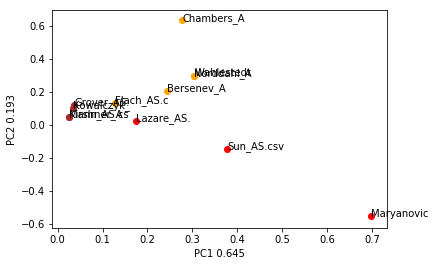

In [9]:
from sklearn.decomposition import PCA
fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')

X = np.array(np.transpose(logFCs))
pca = PCA(n_components=3)
pca.fit(X)
pc1=pca.components_[0]
print("length PC", len(pc1))
pc2=pca.components_[1]
pc3=pca.components_[2]
colorz=["orange","orange","orange","orange","orange","brown","brown","brown","brown","red","red","red"]
print("explained", pca.explained_variance_ratio_)

for i in range(len(pc1)): #plot each point + it's index as text above
    ax.scatter(pc1[i],pc2[i],color=colorz[i])
    ax.text(pc1[i],pc2[i],  files[i][:10])
ax.set_xlabel('PC1 '+str(round(pca.explained_variance_ratio_[0],3)))
ax.set_ylabel('PC2 '+str(round(pca.explained_variance_ratio_[1],3)))


The most distant sets are Maryanovich and Sun, are the most extreme in fold change values. This explains the distances. 